C:\Users\jhona\AppData\Local\Temp\ipykernel_84\4163728212.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'Masculino': 6, 'Femenino': 7}).astype(int)


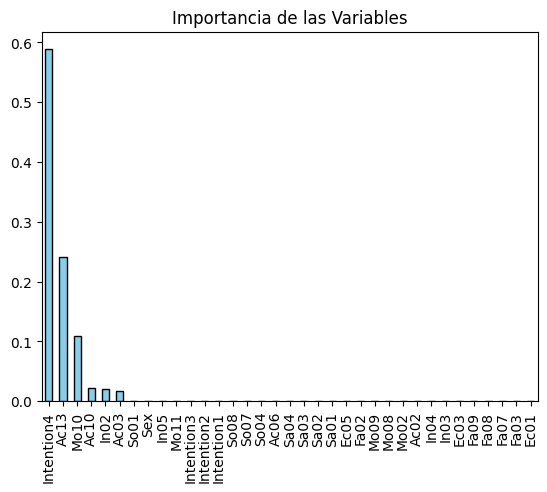

In [3]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.tree import export_graphviz
from graphviz import Source



# Directorio donde se encuentran los archivos
directory = 'answers/'

# Obtener la lista de archivos en el directorio
files = [f for f in os.listdir(directory) if f.endswith('.csv')]
  # Verificar si hay archivos CSV


    # Obtener la ruta completa de cada archivo y su tiempo de creación
files_with_dates = [(os.path.join(directory, f), os.path.getctime(os.path.join(directory, f))) for f in files]

    # Ordenar los archivos por fecha de creación (más reciente primero)
latest_file = max(files_with_dates, key=lambda x: x[1])

    # Cargar el último archivo CSV
df = pd.read_csv(latest_file[0])

# Creación de la variable objetivo (y) como promedio de todas las categorías
y = (
    df['In02'] + df['In03'] + df['In04'] + df['In05'] +  # Intención de deserción
    df['Ac02'] + df['Ac03'] + df['Ac06'] + df['Ac10'] + df['Ac13'] +  # Académico
    df['Ec01'] + df['Ec03'] + df['Ec05'] +  # Económico
    df['Fa02'] + df['Fa03'] + df['Fa07'] + df['Fa08'] + df['Fa09'] +  # Familiar
    df['Mo02'] + df['Mo08'] + df['Mo09'] + df['Mo10'] + df['Mo11'] +  # Motivacional
    df['Sa01'] + df['Sa02'] + df['Sa03'] + df['Sa04'] +  # Salud
    df['So01'] + df['So04'] + df['So07'] + df['So08']  # Social
) / 25  # Promedio de todas las columnas sumadas


df['y'] = y


# Reemplazar valores en la columna 'Sex'
df['Sex'] = df['Sex'].replace({6: 'Masculino', 7: 'Femenino'})

# Agrupación por género y cálculo de la media
gender_analysis = df.groupby('Sex')['y'].mean()

# Visualización de la variable objetivo por género
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='y', data=df)

plt.title('Distribución de la Variable Objetivo por Género')
plt.xlabel('Género')
plt.ylabel('Variable Objetivo (Promedio de todas las categorías)')

# Generar nombre de archivo con fecha y hora
now = datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")  # Formato YYYYMMDD_HHMMSS
file_path = f'img/variable_genero_{timestamp}.png'

# Verificar si el archivo ya existe y agregar un sufijo si es necesario
counter = 1
while os.path.exists(file_path):
    file_path = f'img/variable_genero_{timestamp}_{counter}.png'
    counter += 1

# Guardar la imagen
plt.savefig(file_path)
plt.close()  # Cerrar la figura para liberar memoria


# Supongamos que ya has cargado tu DataFrame 'df'
# Convertir la columna 'Sex' a tipo string, en caso de que no lo sea
df['Sex'] = df['Sex'].astype(str)

# Reemplazar los valores de 'Sex' con 6 para 'Masculino' y 7 para 'Femenino'
df['Sex'] = df['Sex'].replace({'Masculino': 6, 'Femenino': 7}).astype(int)

# Definición de las características (X) para el modelo
headers = ['Sex', 'Ac02', 'Ac03', 'Ac06', 'Ac10', 'Ac13', 'Ec01', 'Ec03', 'Ec05', 'Fa02', 'Fa03', 
           'Fa07', 'Fa08', 'Fa09', 'In02', 'In03', 'In04', 'In05', 'Mo02', 'Mo08', 'Mo09', 
           'Mo10', 'Mo11', 'Sa01', 'Sa02', 'Sa03', 'Sa04', 'So01', 'So04', 'So07', 'So08', 
           'Intention1', 'Intention2', 'Intention3', 'Intention4']

X = df[headers]
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Regresión Lineal
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
# Evaluación del modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Análisis estadístico más detallado con statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()
# Árbol de Regresión
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
import os
from datetime import datetime
from sklearn.tree import export_graphviz
from graphviz import Source

# Obtener la fecha y hora actuales para el nombre del archivo
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")  # Formato: YYYYMMDD_HHMMSS
dot_output_dir = 'regresions/'  # Ruta relativa para la carpeta de archivos DOT
png_output_dir = 'img/regresiones/'  # Ruta para la carpeta de archivos PNG

# Crear las carpetas si no existen
os.makedirs(dot_output_dir, exist_ok=True)  # Crear carpeta para archivos DOT
os.makedirs(png_output_dir, exist_ok=True)  # Crear carpeta para archivos PNG

# Nombre del archivo DOT
dot_file_name = f'{dot_output_dir}regresion_{current_time}.dot'  # Nombre del archivo DOT

# Exportar el árbol de decisión para visualización
export_graphviz(
    tree_reg,
    out_file=dot_file_name,  # Usar el nombre formateado
    feature_names=headers,
    rounded=True,
    filled=True
)

# Verificar si el archivo DOT se creó
if os.path.exists(dot_file_name):
    # Visualizar el árbol de decisión desde el archivo recién creado
    dot_source = Source.from_file(dot_file_name)

    # Nombre del archivo PNG en la ruta deseada
    png_file_name = f'{png_output_dir}regresion_{current_time}'  # Nombre del archivo PNG sin la extensión

    # Renderizar el archivo y guardar en la ubicación deseada
    dot_source.render(filename=png_file_name, format='png', cleanup=True)  # Guarda el archivo como PNG

    # Verificar si el archivo PNG se creó
    png_full_path = f'{png_file_name}.png' 

    # Evaluación del árbol de regresión
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Cálculo del Error Medio Absoluto
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
# Comparación del rendimiento en entrenamiento vs prueba
y_train_pred = tree_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
# Visualización de la importancia de las características
importances = tree_reg.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Importancia de las Variables')

plt.savefig('importances.png', format='png', bbox_inches='tight') 
# Guardar las predicciones en un archivo CSV
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Previsto': y_pred
})



# Ruta y nombre del archivo
output_dir = 'predicciones/'
fecha_actual = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")  # Formato de fecha
output_file = f'predicciones_{fecha_actual}.csv'  # Nombre con fecha

# Verificar si el directorio existe, y si no, crearlo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Crear un nuevo nombre si el archivo ya existe
contador = 1
nuevo_output_file = output_file
while os.path.exists(os.path.join(output_dir, nuevo_output_file)):
    nuevo_output_file = f'predicciones_{fecha_actual}_{contador}.csv'
    contador += 1

# Guardar las predicciones en el archivo CSV
predictions_df.to_csv(os.path.join(output_dir, nuevo_output_file), index=False)




